# GAN Model 

In this notebook, we will attempt to create a DCGAN in order to generate movie posters of specific genres. 



First, lets inspect some of the posters we are looking at. Here are some posters for the "Comedy" genre. 

In [5]:
from models.GANModel import GANModel 
# from GenreDataset import GenreDataset 
import numpy as np
import glob
import tensorflow as tf
from PIL import Image
from GenreDataset import GenreDataset
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
def show_images(X):
    fig = plt.figure() 
    rows, columns = 1, X.shape[-1]
    fig = plt.figure()
    for i in range(1, rows*columns+1):
        fig.add_subplot(rows, columns, i)
        image = X[i-1]
        plt.imshow(image)
        plt.axis('off')

In [7]:
def get_session():
    config = tf.ConfigProto() 
    config.gpu_options.allow_growth = True 
    session = tf.Session(config=config) 
    return session

In [37]:
dataset = GenreDataset("Romance", 100)

(16043, 64, 64, 3)


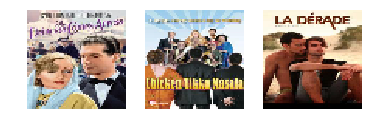

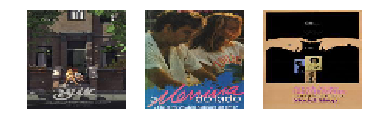

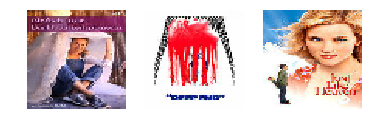

In [42]:
idx = np.random.randint(0, dataset.X.shape[0])
show_images(dataset.X[idx:idx+4])

idx = np.random.randint(0, dataset.X.shape[0])
show_images(dataset.X[idx:idx+4])

idx = np.random.randint(0, dataset.X.shape[0])
show_images(dataset.X[idx:idx+4])

# Training a Model

We will now try to make a GAN using the comedy genre. 

Epoch #0 out of 5: 


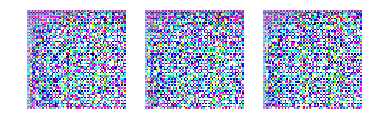

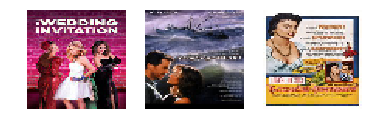


112/161 [===================>..........] - ETA: 468s - D Loss: 43.9216 - G Loss: 1.2000

In [ ]:
model = GANModel("Romance", 100, lr=0.0002)
with tf.Session() as sess: 
#     sess.run(tf.global_variables_initializer())
#     sess.run(tf.local_variables_initializer())
    model.fit(sess, dataset)

In [ ]:
agi 1546
sta 2318
str 3864